In [18]:
# Basic Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
df = pd.read_csv('Crime_Data_Clean.csv')
df = df.set_index("Incident ID")

In [20]:
#Convert Time Objects
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])
df['date'] = [d.date() for d in df['Start_Date_Time']]
df['time'] = [d.time() for d in df['Start_Date_Time']]
df['day'] = df['Start_Date_Time'].dt.day_name()

In [21]:
df_victims_date = df.groupby("date")["date"].count().sort_values()
df_victims_date.head()

date
2018-11-11    12
2020-04-04    13
2019-12-22    13
2019-11-28    14
2020-01-20    15
Name: date, dtype: int64

In [22]:
df_table = df_victims_date.reset_index(name="Victim Count")
print(df_table)

            date  Victim Count
0     2018-11-11            12
1     2020-04-04            13
2     2019-12-22            13
3     2019-11-28            14
4     2020-01-20            15
...          ...           ...
2224  2017-12-01           223
2225  2017-08-01           225
2226  2016-12-01           230
2227  2016-07-01           240
2228  2017-11-01           242

[2229 rows x 2 columns]


In [23]:
df_table = df_table.fillna(value=np.nan)

In [24]:
# Can't Use Datatime for Regression, Convert datetime to string
df_table['date'] = pd.to_datetime(df_table['date'])
df_table['date'] = df_table['date'].map(dt.datetime.toordinal)

In [25]:
df_table

,date,Victim Count
0,737009,12
1,737519,13
2,737415,13
3,737391,14
4,737444,15
...,...,...
2224,736664,223
2225,736542,225
2226,736299,230
2227,736146,240


In [26]:
y = df_table['Victim Count'].values.reshape(-1, 1)
X = df_table['date'].values.reshape(-1, 1)

print(X.shape)
print(X)

(2229, 1)
[[737009]
 [737519]
 [737415]
 ...
 [736299]
 [736146]
 [736634]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
#Prediciting Y from Linear regression Model
y_pred = regressor.predict(X_test)

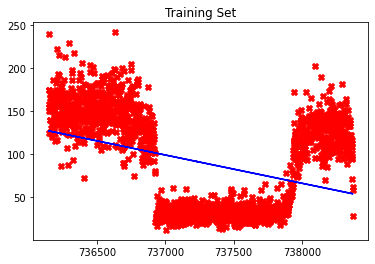

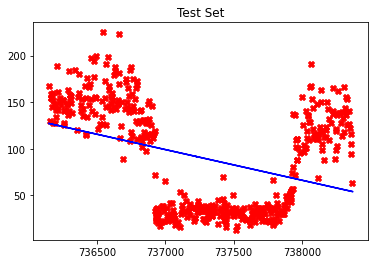

In [14]:
#ploting graph
plt.scatter(X_train,y_train,color='red',marker='X')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Training Set')
plt.show()

plt.scatter(X_test,y_test,color='red',marker='X')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Test Set')
plt.show()